## `19IT031 Aman Desai`
## Practical - 7 `Multi Class Classification (KNN)`  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
dataset = pd.read_csv('mobile_info.csv')
dataset.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
dataset.shape[0]

2000

### 1. Why you want to apply classification on selected dataset? Discuss full story behind dataset.

In this competitive mobile phone market we cannot simply assume things and prices about the smartphones. So here is a dataset consisting of 2000 different mobiles having different specification. we need to predict the range of price based on given data.

### 2. How many total observations in data?

There are total 2000 observations and 21 features.

In [4]:
dataset.shape

(2000, 21)

### 3. How many independent variables?

Total 20 independent variables are present in the dataset. They are as follows:

In [5]:
x = dataset.iloc[:,:-1]
x.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


### 4. Which is dependent variable?

The variable `price_range` is dependent on the other independent variables as the value of `price_range` depends on the value of independent variables.

In [6]:
y = dataset.iloc[:,-1].values

### 5. Which are most useful variable in classification? Prove using correlation.

<Figure size 1152x504 with 0 Axes>

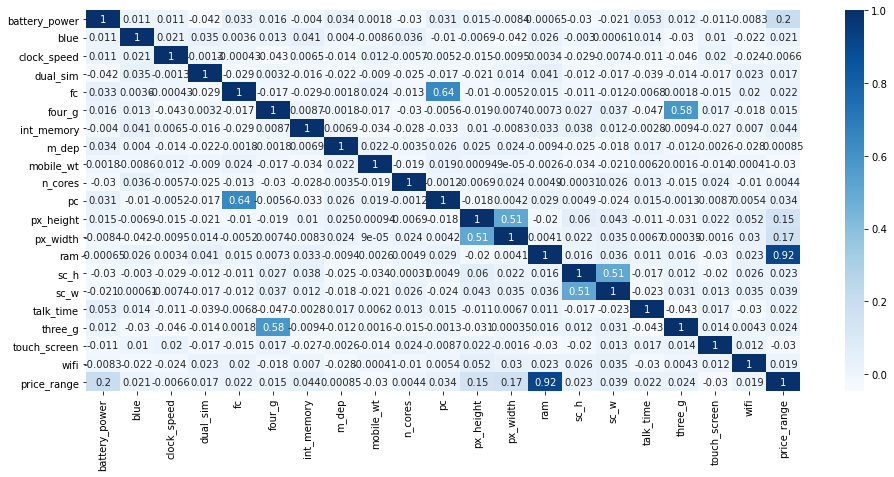

In [7]:
plt.figure(figsize = (16,7))
sns.heatmap(dataset.corr(), cmap="Blues", annot = True)
plt.show()

Here from the above correlation heatmap we can say that Ram, and battery power are the most useful independent variables for classification.

In [8]:
# spliting the dataset into training and testing

# selecting only those variable which are most useful
#First making a list of true and false
useful_list = []
for i in range(21):
    if i == 0 or i == 12 or i == 13:
        useful_list.append(True)
    else:
        useful_list.append(False)

x = dataset.iloc[:, useful_list].values
#No need
st_x = StandardScaler()
st_x.fit(x)
X = st_x.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

#No need
x_train = st_x.fit_transform(x_train)
x_test = st_x.fit_transform(x_test)

StandardScaler()

### 6. Implement KNN using sklearn api.

In [9]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model.fit(x_train, y_train)

prediction = model.predict(x_test)

KNeighborsClassifier()

In [10]:
prediction

array([3, 0, 2, 2, 3, 0, 0, 3, 3, 1, 0, 3, 0, 2, 3, 0, 3, 2, 2, 1, 0, 0,
       3, 1, 1, 2, 3, 1, 3, 1, 2, 0, 2, 0, 2, 3, 0, 0, 3, 3, 2, 1, 3, 2,
       1, 3, 0, 2, 2, 1, 1, 3, 0, 3, 0, 3, 2, 2, 0, 2, 3, 1, 3, 2, 1, 2,
       3, 2, 1, 2, 3, 2, 1, 0, 1, 3, 2, 1, 1, 1, 3, 3, 3, 0, 0, 0, 2, 0,
       2, 3, 1, 2, 2, 1, 0, 2, 3, 3, 0, 3, 1, 1, 2, 1, 3, 2, 2, 3, 2, 3,
       3, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 3, 2, 2, 1, 2, 1, 1, 0, 2, 1, 3,
       2, 3, 3, 3, 3, 2, 0, 1, 1, 2, 2, 3, 1, 3, 0, 0, 2, 0, 1, 1, 1, 1,
       3, 1, 1, 3, 1, 3, 2, 1, 3, 1, 2, 3, 3, 2, 1, 0, 3, 1, 2, 3, 3, 0,
       2, 2, 3, 1, 2, 1, 0, 1, 2, 1, 2, 0, 2, 3, 1, 1, 0, 2, 3, 0, 1, 2,
       1, 0, 3, 3, 2, 1, 1, 3, 3, 3, 0, 0, 0, 2, 3, 3, 0, 0, 1, 3, 1, 3,
       3, 3, 0, 0, 2, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 1, 2, 2, 1, 1, 1, 2,
       3, 3, 0, 0, 1, 3, 3, 2, 3, 0, 3, 1, 1, 0, 1, 3, 2, 2, 1, 0, 1, 2,
       3, 2, 2, 3, 1, 1, 0, 3, 3, 2, 1, 3, 3, 2, 2, 1, 0, 2, 2, 1, 0, 0,
       3, 2, 2, 2, 0, 1, 3, 0, 1, 2, 3, 0, 2, 0, 0,

In [11]:
print(classification_report(y_test, prediction))

print(confusion_matrix(y_test, prediction))

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       151
           1       0.77      0.84      0.81       135
           2       0.82      0.80      0.81       151
           3       0.93      0.87      0.90       163

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

[[137  14   0   0]
 [ 15 114   6   0]
 [  0  20 121  10]
 [  0   0  21 142]]


### 7. Implement code to find best value of k by splitting data in train and test.

<Figure size 1152x504 with 0 Axes>

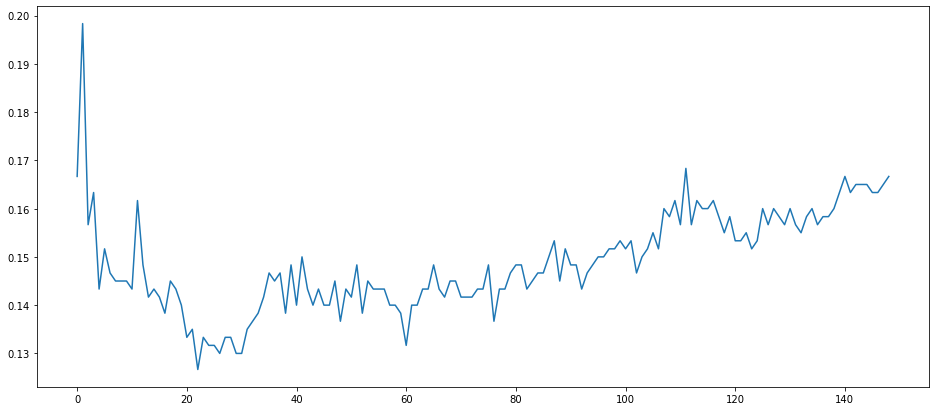

In [12]:
# already split the data above in training and testing

error_rates = []

for i in np.arange(1, 150):

    new_model = KNeighborsClassifier(n_neighbors = i, metric='minkowski', p=2)

    _ = new_model.fit(x_train, y_train)

    new_predictions = new_model.predict(x_test)

    rate = np.mean(new_predictions != y_test)
   
    error_rates.append(rate)

plt.figure(figsize=(16,7))

plt.plot(error_rates)

In [13]:
model = KNeighborsClassifier(n_neighbors=15, metric='minkowski', p=2)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

KNeighborsClassifier(n_neighbors=15)

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       151
           1       0.78      0.84      0.81       135
           2       0.80      0.81      0.81       151
           3       0.95      0.85      0.90       163

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600

[[138  13   0   0]
 [ 14 114   7   0]
 [  0  20 123   8]
 [  0   0  24 139]]


### 8. Quantify goodness of your model and discuss steps taken for improvement.

Here from above accruacy we can see that we got 91% by optimizing the value of k. The optimized value of k is 15. Earlier we took k's value as 5 and got 87%. Also the random_state value was changed from 0 to 4. We got a 1% increase  by doing that. By changing the random state value, our dataset is divide more evenly into training and testing and because of which during training our model is aware of all different types of data.

### 9. Can we use KNN for regression also? Why / Why not?

As we saw above, KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set.

### 10. Discuss drawbacks of algorithms such as KNN.

- **Does not work well with large dataset:** In large datasets, the cost of calculating the distance between the new point and each existing points is huge which degrades the performance of the algorithm.
- **Does not work well with high dimensions:** The KNN algorithm doesn't work well with high dimensional data because with large number of dimensions, it becomes difficult for the algorithm to calculate the distance in each dimension.

- **Need feature scaling:** We need to do feature scaling (standardization and normalization) before applying KNN algorithm to any dataset. If we don't do so, KNN may generate wrong predictions.

- **Sensitive to noisy data, missing values and outliers:** KNN is sensitive to noise in the dataset. We need to manually impute missing values and remove outliers.

## Conclusion:

* KNN is most useful when labeled data is too expensive or impossible to obtain, and it can
achieve high accuracy in a wide variety of prediction-type problems.


* KNN is a simple algorithm, based on the local minimum of the target function which is used
to learn an unknown function of desired precision and accuracy.
